Hyperparameter tuning relates to how we sample candidate model architectures from the space of all possible hyperparameter values. This is often referred to as searching the hyperparameter space for the optimum values. In this lesson, we'll look at some of the key hyperparameters for decision trees and how they affect the learning and prediction processes.

In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins.

A decision tree, grown beyond a certain level of complexity leads to overfitting. If we grow our tree and carry on using poor predictors that don't have any impact on the accuracy, we will eventually a) slow down the learning, and b) cause overfitting. Different tree pruning parameters can adjust the amount of overfitting or underfitting in order to optimize for increased accuracy, precision, and/or recall.

### This process of trimming decision trees to optimize the learning process is called "tree pruning".

We can prune our trees using:

Maximum depth: Reduce the depth of the tree to build a generalized tree. Set the depth of the tree to 3, 5, 10 depending after verification on test data

Minimum samples leaf with split: Restrict the size of sample leaf

Minimum leaf sample size: Size in terminal nodes can be fixed to 30, 100, 300 or 5% of total

Maximum leaf nodes: Reduce the number of leaf nodes

Maximum features: Maximum number of features to consider when splitting a node



The parameter for decision trees that we normally tune first is max_depth. This parameter indicates how deep we want our tree to be. If the tree is too deep, it means we are creating a large number of splits in the parameter space and capturing more information about underlying data. This may result in overfitting as it will lead to learning granular information from given data, which makes it difficult for our model to generalize on unseen data. Generally speaking, a low training error but a large testing error is a strong indication of this.

If, on the other hand, the tree is too shallow, we may run into underfitting, i.e., we are not learning enough information about the data and the accuracy of the model stays low for both the test and training samples

In [95]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

In [96]:
df = pd.read_csv('CSV/titanic_proon.csv')

In [97]:
y = df.Survived
X = df.drop(columns=['Survived', 'PassengerId'])

In [98]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

clf = DecisionTreeClassifier(criterion = "entropy", random_state= seed)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7367718101733446

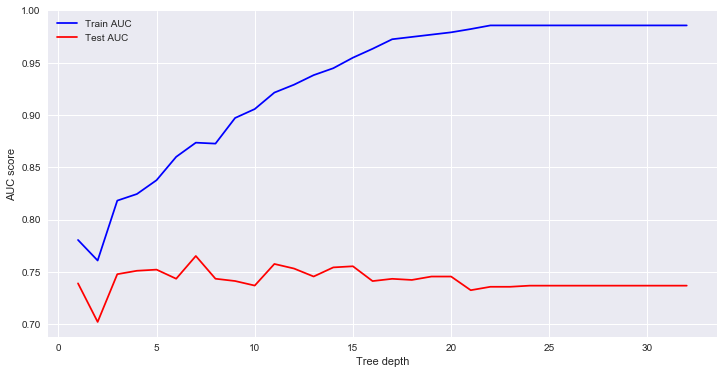

In [99]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

test_results = []
train_results = []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth = max_depth, criterion = "entropy", random_state= seed)
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Adding to train results 
    train_results.append(roc_auc)
    
    # Adding to train results 
    test_pred = clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [100]:
# Training error decreases with increasing tree depth - clear sign of overfitting 
# Test error increases after depth=3 - nothing more to learn from deeper trees (some fluctuations, but not stable)
# Training and test errors rise rapidly between the depths of 2 and 3
# Optimal value seen here is 3


### min-samples-split

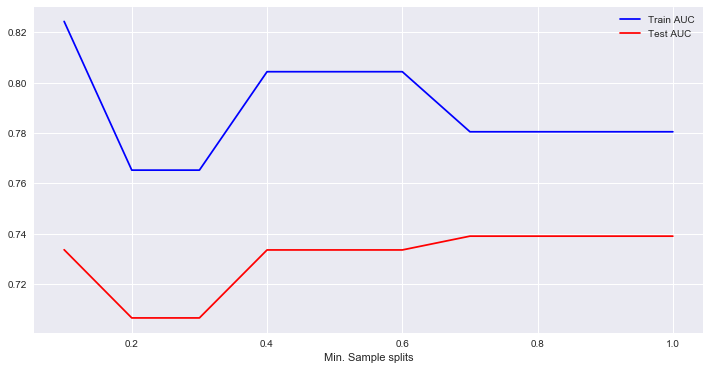

In [101]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=seed)
   clf.fit(X_train, y_train)
   train_pred = clf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = clf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

In [102]:
# AUC for both test and train data stabilizes at 0.7 
# Further increase in minimum sample split does not improve learning 

### Minimum Sample Leafs

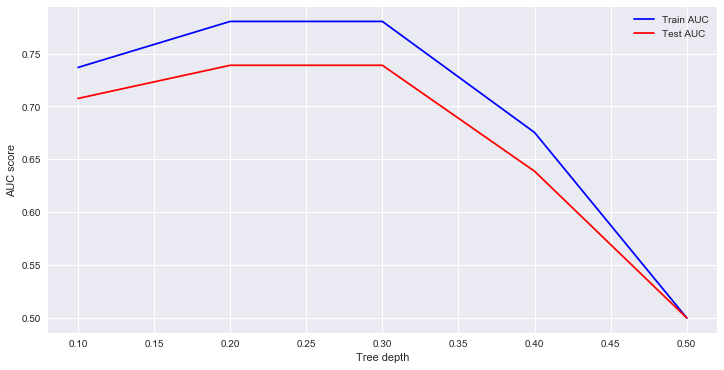

In [103]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

test_results = []
train_results = []

for min_samples_leaf in min_samples_leafs:
    clf = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf, criterion = "entropy", random_state= seed)
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Adding to train results 
    train_results.append(roc_auc)
    
    # Adding to train results 
    test_pred = clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [104]:
# AUC gives best value between 0.2 and 0.3 for both test and training sets 
# The accuracy drops down if we continue to increase the parameter value 

### Maximum Features

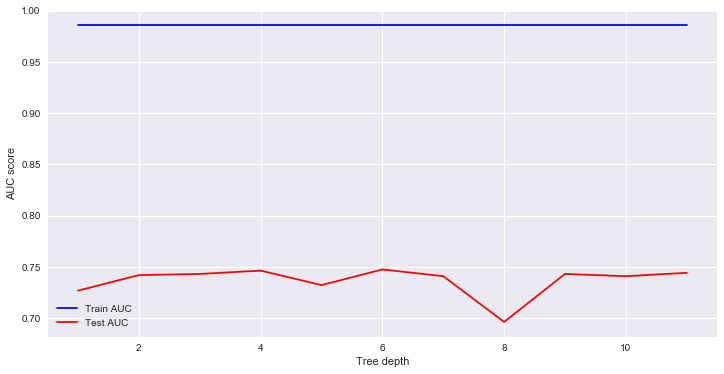

In [149]:
max_features = list(range(1, X_train.shape[1]))

test_results = []
train_results = []

for max_feature in max_features:
    clf = DecisionTreeClassifier(max_features = max_feature, criterion = "entropy", random_state= seed)
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Adding to train results 
    train_results.append(roc_auc)
    
    # Adding to train results 
    test_pred = clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

In [150]:
# No clear effect on the training dataset - flat AUC 
# Some fluctuations in test AUC but not definitive enough to make a judgement
# Highest AUC value seen at 6

In [155]:
best_clf = DecisionTreeClassifier(criterion = 'entropy',
                                 max_features = 11,
                                 max_depth =3,
                                 min_samples_split =0.7,
                                 min_samples_leaf =0.25,
                                 random_state =seed 
                                 )
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=11,
                       min_samples_leaf=0.25, min_samples_split=0.7,
                       random_state=1)

In [156]:
y_pred = best_clf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7389599317988065

In [157]:
# We improved the AUC from 0.73 in the vanilla classifier to 0.74 with some tuning. 
# Due to randomness, results may slightly differ, there is some improvement in most cases. 
# With more complicated (and bigger) datasets, 
# we might see an even bigger improvement in AUC/accuracy of the classifier. 